



# Analyzing Data with Pandas and Visualizing Results with Matplotlib

**Objective For this Assignment**:
To load and analyze a dataset using the pandas library in Python.
To create simple plots and charts with the matplotlib library for visualizing the data.

**Submission Requirements**
Submit a Jupyter notebook (.ipynb file) or Python script (.py file) containing:

1.   Data loading and exploration steps.
2.   Basic data analysis results.
3.   Visualizations.
4.   Any findings or observations.

In [ ]:
pwd


'/content'

In [ ]:
ls -l

total 220
-rw-r--r-- 1 root root 217787 Jan 28 07:38 index.csv
drwxr-xr-x 1 root root   4096 Jan 24 14:22 sample_data/


# Task 1: Load and Explore the Dataset

*   Load the dataset using pandas.
*   Display the first few rows of the dataset using .head() to inspect the data.



In [ ]:
# DOWNLOAD AND MOVE TO THE CURRENT PWD.import kagglehub
# Download latest version
# path = kagglehub.dataset_download("ihelon/coffee-sales")
# print("Path to dataset files:", path)

import kagglehub
import os
import shutil

# Download latest version
path = kagglehub.dataset_download("ihelon/coffee-sales")
print("Path to dataset files:", path)

# Get the current working directory
current_directory = os.getcwd()

# Iterate through the downloaded files and move them
for filename in os.listdir(path):
    source_path = os.path.join(path, filename)
    destination_path = os.path.join(current_directory, filename)

    # Move the file to the current working directory
    shutil.move(source_path, destination_path)
    print(f"Moved {filename} to {current_directory}")

# Remove the original download directory (optional)
shutil.rmtree(path)
print(f"Removed temporary directory: {path}")

!ls


100%|██████████| 31.9k/31.9k [00:00<00:00, 13.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ihelon/coffee-sales/versions/18
Moved index.csv to /content
Removed temporary directory: /root/.cache/kagglehub/datasets/ihelon/coffee-sales/versions/18
index.csv  sample_data


In [ ]:
# from now onwards , we will be using index.csv. Load the dataset using pandas.
# Display the first few rows of the dataset using .head() to inspect the data.

import pandas as pd

# Load the dataset
try:
  df = pd.read_csv('index.csv')
  # Display the first few rows
  print(df.head())
except FileNotFoundError:
  print("Error: 'index.csv' not found. Please ensure the file is present in the current directory.")
except pd.errors.ParserError:
  print("Error: Could not parse 'index.csv'. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


**Explore the structure of the dataset by checking the data types and any missing values.**

In [ ]:
# Explore the structure of the dataset by checking the data types and any missing values.

# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


**Clean the dataset by either filling or dropping any missing values.**

In [ ]:
# Clean the dataset by either filling or dropping any missing values.

# Fill missing values in 'Sales' column with the mean
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())

# Fill missing values in 'Quantity' column with the median
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

# Drop rows with missing values in other columns (if any)
df = df.dropna()

# Verify if there are any missing values left
print(df.isnull().sum())

KeyError: 'Sales'

In [ ]:
print(df.columns)

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')


In [ ]:
# Check column names
print(df.columns)

# Fill missing values in the 'money' column with the mean
df['money'] = df['money'].fillna(df['money'].mean())

# Fill missing values in the 'card' column with a placeholder
df['card'] = df['card'].fillna('Unknown')

# Drop rows with missing values in other columns (if any)
df = df.dropna()

# Verify if there are any missing values left
print(df.isnull().sum())


Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')
date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64


## **Task 2: Basic Data Analysis**

**2.1 Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().**

In [ ]:
# prompt: Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().

# Select numerical columns for description
numerical_cols = df.select_dtypes(include=['number'])

# Compute and print basic statistics
print(numerical_cols.describe())

             money
count  2838.000000
mean     31.887456
std       4.974523
min      18.120000
25%      27.920000
50%      32.820000
75%      35.760000
max      40.000000


In [ ]:
# Compute basic statistics for numerical columns
numerical_stats = df.describe()

# Print the statistics
print(numerical_stats)


             money
count  2838.000000
mean     31.887456
std       4.974523
min      18.120000
25%      27.920000
50%      32.820000
75%      35.760000
max      40.000000


**2.2 Perform groupings on a categorical column (for example, species, region, or department) and compute the mean of a numerical column for each group.**

In [ ]:
# Group by 'coffee_name' and calculate the mean of 'money' for each group
grouped_data = df.groupby('coffee_name')['money'].mean()

# Print the grouped data
print(grouped_data)


coffee_name
Americano              26.125360
Americano with Milk    30.623323
Cappuccino             36.057437
Cocoa                  35.684706
Cortado                25.794088
Espresso               20.986095
Hot Chocolate          36.153482
Latte                  35.612157
Name: money, dtype: float64


*Identify any patterns or interesting findings from your analysis.*

In [ ]:
# prompt: Identify any patterns or interesting findings from your analysis.

# Identify patterns and interesting findings

# Analyze the grouped data to find patterns in coffee sales
print(grouped_data.sort_values(ascending=False))

# Further analysis can be done to explore correlations and trends
# For example, check the relationship between sales and other variables,
# seasonal trends, or the impact of promotions.


# Example: Find the coffee with the highest average sales
highest_sales_coffee = grouped_data.idxmax()
print(f"\nThe coffee with the highest average money is: {highest_sales_coffee}")

# Example: Find the coffee with the lowest average sales
lowest_sales_coffee = grouped_data.idxmin()
print(f"The coffee with the lowest average money is: {lowest_sales_coffee}")


# You can add more analysis based on your specific questions and hypotheses.
# For example, you might explore relationships between 'money', 'quantity', 'card', etc.,
# or analyze sales trends over time.

coffee_name
Hot Chocolate          36.153482
Cappuccino             36.057437
Cocoa                  35.684706
Latte                  35.612157
Americano with Milk    30.623323
Americano              26.125360
Cortado                25.794088
Espresso               20.986095
Name: money, dtype: float64

The coffee with the highest average money is: Hot Chocolate
The coffee with the lowest average money is: Espresso


**2.2.2 Average Money Spent Per Coffee**

In [ ]:
# Calculate the average money spent for each coffee type
avg_money_per_coffee = df.groupby('coffee_name')['money'].mean()
print("Average Money Spent Per Coffee Type:")
print(avg_money_per_coffee)


Average Money Spent Per Coffee Type:
coffee_name
Americano              26.125360
Americano with Milk    30.623323
Cappuccino             36.057437
Cocoa                  35.684706
Cortado                25.794088
Espresso               20.986095
Hot Chocolate          36.153482
Latte                  35.612157
Name: money, dtype: float64


**2.2.3 Missing Data in 'Card'**

In [ ]:
# Check for missing values in 'card' column
missing_card_count = df['card'].isnull().sum()
print(f"Number of Missing Values in 'card': {missing_card_count}")


Number of Missing Values in 'card': 0


**2.2.4 Range of Money Spent**

In [ ]:
# Get min and max of 'money'
money_range = df['money'].agg(['min', 'max'])
print("Range of Money Spent:")
print(money_range)


Range of Money Spent:
min    18.12
max    40.00
Name: money, dtype: float64


**2.2.5 Popular Coffee**

In [ ]:

# Count occurrences of each coffee type
popular_coffee = df['coffee_name'].value_counts()
print("Popular Coffee Types:")
popular_coffee

Popular Coffee Types:


,count
coffee_name,
Americano with Milk,674
Latte,663
Cappuccino,398
Americano,347
Cortado,274
Hot Chocolate,224
Cocoa,153
Espresso,105


**2.2.6 Spending patterns by coffe types**

In [ ]:

# Total money spent for each coffee type
total_money_per_coffee = df.groupby('coffee_name')['money'].sum()
print("Total Money Spent Per Coffee Type:")
total_money_per_coffee

Total Money Spent Per Coffee Type:


,money
coffee_name,
Americano,9065.50
Americano with Milk,20640.12
Cappuccino,14350.86
Cocoa,5459.76
Cortado,7067.58
Espresso,2203.54
Hot Chocolate,8098.38
Latte,23610.86


**2.2.7 Cash vs. Card Usage**

In [ ]:

# Count payment types in 'cash_type'
payment_types = df['cash_type'].value_counts()
print("Payment Type Distribution:")
payment_types

Payment Type Distribution:


,count
cash_type,
card,2749
cash,89


# **Task 3: Data Visualization**

**Line chart showing trends over time**

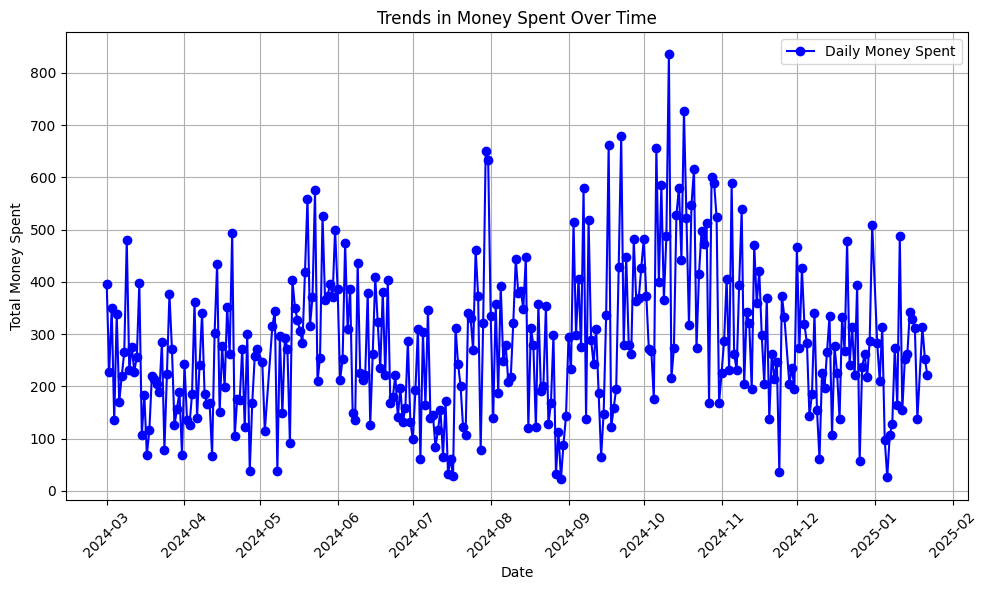

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Ensure the 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort the dataset by the 'datetime' column to ensure proper plotting
df = df.sort_values(by='datetime')

# Group by date (or datetime) and calculate total money spent per day
daily_trends = df.groupby(df['datetime'].dt.date)['money'].sum()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(daily_trends.index, daily_trends.values, marker='o', linestyle='-', color='blue', label='Daily Money Spent')

# Customize the plot
plt.title("Trends in Money Spent Over Time")
plt.xlabel("Date")
plt.ylabel("Total Money Spent")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


**Bar chart showing the comparison of a numerical value across categories**

<ipython-input-43-baec77e98d35>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coffee_name', y='money', data=total_money_per_coffee, palette='viridis')


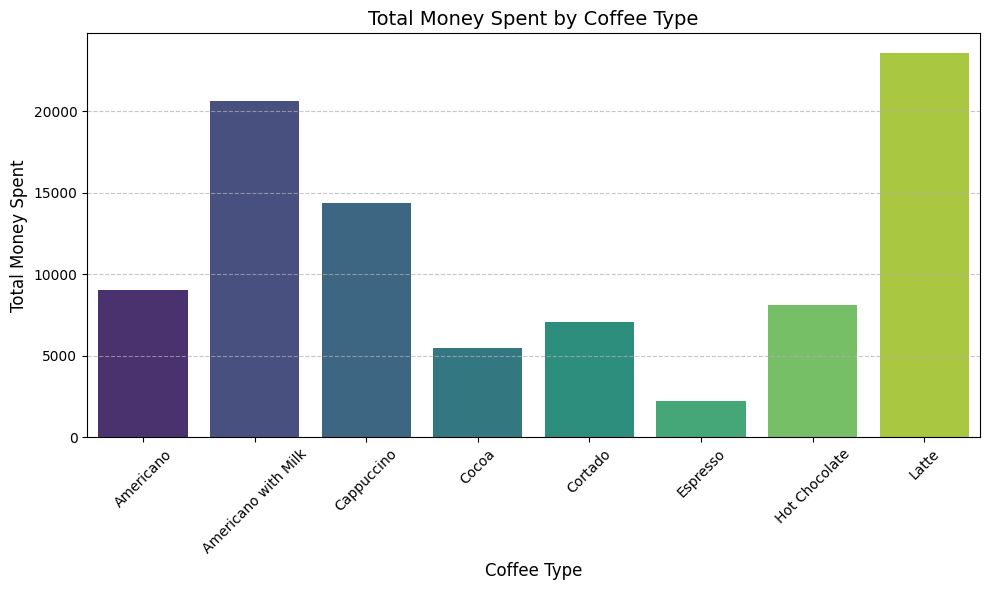

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'coffee_name' and calculate the total money spent for each coffee type
total_money_per_coffee = df.groupby('coffee_name')['money'].sum().reset_index()

# Plot the bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='coffee_name', y='money', data=total_money_per_coffee, palette='viridis')

# Customize the chart
plt.title("Total Money Spent by Coffee Type", fontsize=14)
plt.xlabel("Coffee Type", fontsize=12)
plt.ylabel("Total Money Spent", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


**Histogram of a numerical column to understand its distribution.**

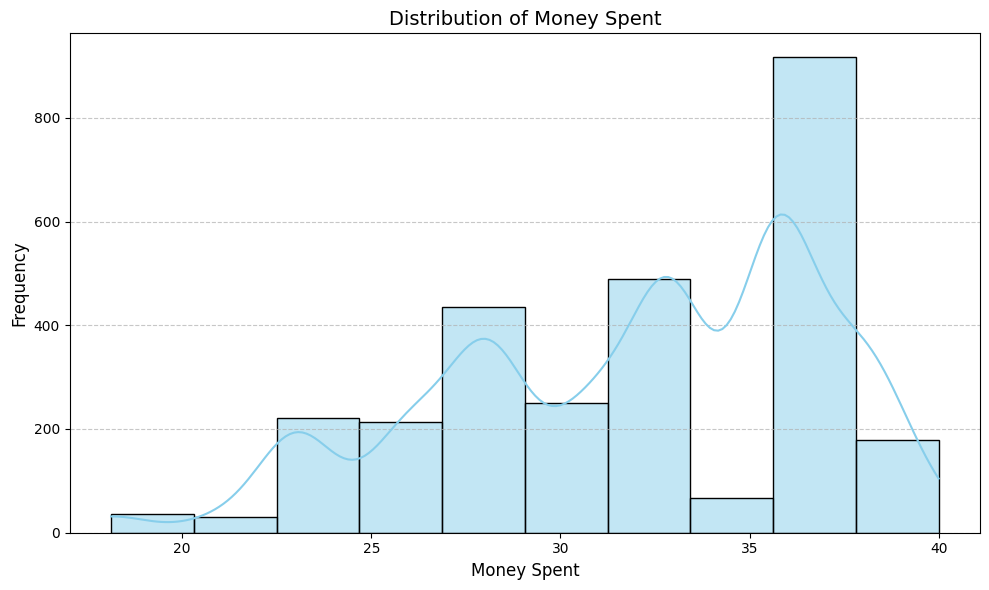

In [ ]:
import seaborn as sns
# 'money' is a numerical column in the DataFrame 'df'
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['money'], bins=10, kde=True, color='skyblue') # Added kde for better visualization

# Customize the plot
plt.title("Distribution of Money Spent", fontsize=14)
plt.xlabel("Money Spent", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()

Scatter plot to visualize the relationship between two numerical columns

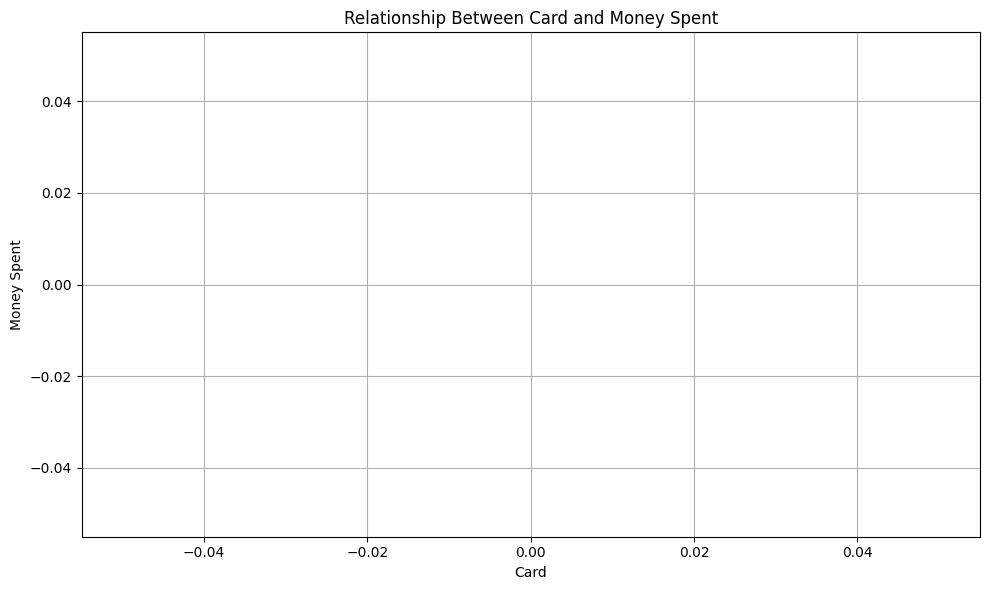

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'card' is numeric (if needed, convert using pd.to_numeric)
df['card'] = pd.to_numeric(df['card'], errors='coerce')

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['card'], df['money'], color='orange', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title("Relationship Between Card and Money Spent")
plt.xlabel("Card")
plt.ylabel("Money Spent")
plt.grid()

# Show the scatter plot
plt.tight_layout()
plt.show()


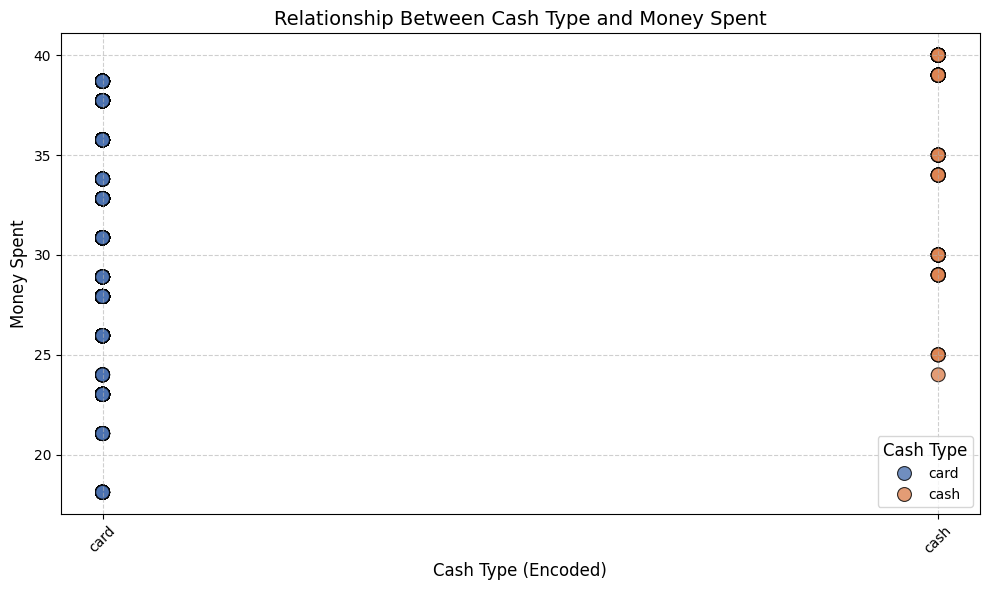

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'cash_type' to numerical codes for visualization
df['cash_type_numeric'] = df['cash_type'].astype('category').cat.codes

# Create the scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cash_type_numeric', y='money', data=df, hue='cash_type', palette='deep', s=100, edgecolor='black', alpha=0.8)

# Customize the plot
plt.title("Relationship Between Cash Type and Money Spent", fontsize=14)
plt.xlabel("Cash Type (Encoded)", fontsize=12)
plt.ylabel("Money Spent", fontsize=12)
plt.xticks(ticks=range(len(df['cash_type'].unique())), labels=df['cash_type'].unique(), rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Cash Type", fontsize=10, title_fontsize=12)
plt.grid(linestyle='--', alpha=0.6)

# Show the scatter plot
plt.tight_layout()
plt.show()


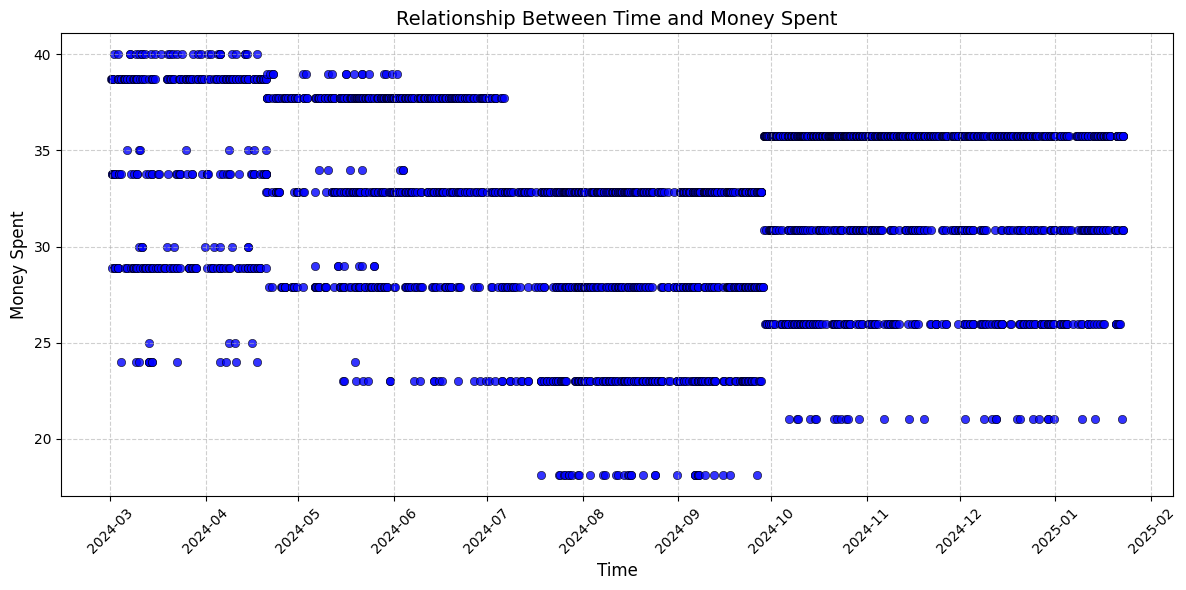

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'datetime' is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Plot the scatter plot with Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['datetime'], y=df['money'], color='blue', edgecolor='black', alpha=0.8)

# Customize the plot
plt.title("Relationship Between Time and Money Spent", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Money Spent", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle='--', alpha=0.6)

# Show the scatter plot
plt.tight_layout()
plt.show()


c nkcdkmxc
 sd nld

nd bdsjn v

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))

const.series = pd.Series(df['money'].values, index=df['datetime'])
const.series.plot(kind='line', color='blue', linewidth=2, marker='o', markersize=5, markerfacecolor='white', markeredgecolor='black', alpha=0.8)

plt.title("Trends in Money Spent Over Time", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Total Money Spent", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
